In [65]:
import numpy as np
import pandas as pd
import os

# Load files

In [78]:
# /home/kai/data/kaggle/homecredit
PATH = '/home/kai/data/kaggle/homecredit/home-credit-default-risk/'
app_train = pd.read_csv(PATH + 'application_train.csv')
app_test = pd.read_csv( PATH + 'application_test.csv') 
bureau = pd.read_csv(PATH + 'bureau.csv')
bureau_balance = pd.read_csv(PATH + 'bureau_balance.csv')

# Train and test 
This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET)

In [144]:
print(app_test['SK_ID_CURR'])
print('#' * 50)
# print(app_train['NAME_CONTRACT_TYPE'])

0        100001
1        100005
2        100013
3        100028
4        100038
5        100042
6        100057
7        100065
8        100066
9        100067
10       100074
11       100090
12       100091
13       100092
14       100106
15       100107
16       100109
17       100117
18       100128
19       100141
20       100150
21       100168
22       100169
23       100170
24       100171
25       100172
26       100184
27       100187
28       100212
29       100222
          ...  
48714    455963
48715    455965
48716    456007
48717    456008
48718    456009
48719    456010
48720    456011
48721    456013
48722    456028
48723    456058
48724    456111
48725    456114
48726    456115
48727    456116
48728    456119
48729    456120
48730    456122
48731    456123
48732    456166
48733    456167
48734    456168
48735    456169
48736    456170
48737    456189
48738    456202
48739    456221
48740    456222
48741    456223
48742    456224
48743    456250
Name: SK_ID_CURR, Length

In [97]:
print(app_train.shape)
print(app_test.shape)
print('#' * 50)
print(app_train.head(5))
print('#' * 50)
print(app_train['SK_ID_CURR'])


(307511, 122)
(48744, 121)
##################################################
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1     

In [136]:
print(app_train.columns.values)

['SK_ID_CURR' 'TARGET' 'NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR'
 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE'
 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'OCCUPATION_TYPE' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'WEEKDAY_APPR_PROCESS_START'
 'HOUR_APPR_PROCESS_START' 'REG_REGION_NOT_LIVE_REGION'
 'REG_REGION_NOT_WORK_REGION' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'
 'LIVE_CITY_NOT_WORK_CITY' 'ORGANIZATION_TYPE' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'COMMONAREA_AVG'
 'ELEVATORS_AVG' 'ENTRANCES_AVG' 'FLOOR

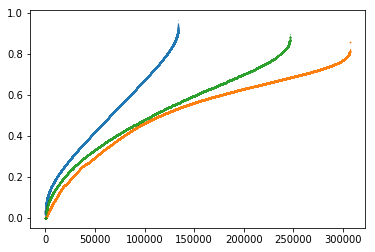

In [157]:
# print(app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']])
# matplotlib.pyplot.scatter¶
ext1 = app_train['EXT_SOURCE_1'].sort_values()

import matplotlib.pyplot as plt
plt.scatter(range(307511), ext1, s = 0.01  )
ext2 = app_train['EXT_SOURCE_2'].sort_values()
import matplotlib.pyplot as plt
plt.scatter(range(307511), ext2, s = 0.01  )
ext3 = app_train['EXT_SOURCE_3'].sort_values()
import matplotlib.pyplot as plt
plt.scatter(range(307511), ext3, s = 0.01  )

(array([3.7400e+02, 1.7220e+03, 3.7660e+03, 5.7990e+03, 7.4410e+03,
        8.3570e+03, 9.2080e+03, 9.5360e+03, 9.8170e+03, 9.8590e+03,
        9.9690e+03, 1.0057e+04, 9.8480e+03, 9.6160e+03, 9.3280e+03,
        8.1940e+03, 6.5420e+03, 3.8930e+03, 8.0500e+02, 2.0000e+00]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

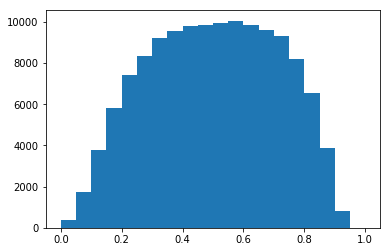

In [170]:
ext1.fillna(-1, inplace = True)
# np.histogram(ext1, bins = 20)
# print(ext1)
plt.hist(ext1, 20,range=(0,1))

(array([5.3590e+03, 6.0060e+03, 6.2750e+03, 1.0225e+04, 9.5020e+03,
        1.4207e+04, 1.2797e+04, 1.4572e+04, 1.6802e+04, 2.1052e+04,
        2.6635e+04, 3.4380e+04, 4.0445e+04, 4.1981e+04, 3.2355e+04,
        1.3689e+04, 5.4300e+02, 2.6000e+01, 0.0000e+00, 0.0000e+00]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

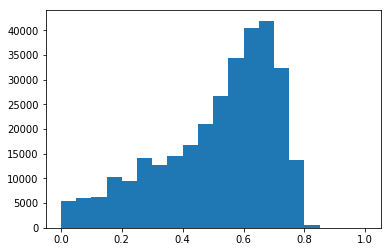

In [171]:
ext2.fillna(-1, inplace = True)
# np.histogram(ext1, bins = 20)
# print(ext1)
plt.hist(ext2, 20,range=(0,1))

(array([ 1619.,  3744.,  6141.,  8010.,  9847., 11734., 14051., 16440.,
        17198., 19361., 21523., 22695., 23725., 23955., 21871., 15373.,
         8192.,  1067.,     0.,     0.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

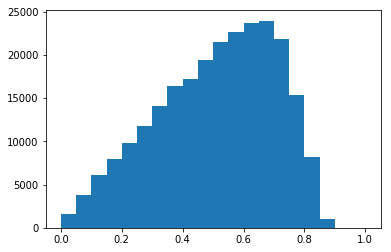

In [172]:
ext3.fillna(-1, inplace = True)
# np.histogram(ext1, bins = 20)
# print(ext1)
plt.hist(ext3, 20,range=(0,1))

In [177]:
tmp = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].fillna(-1)
tmp[((tmp['EXT_SOURCE_1'] == -1) & (tmp['EXT_SOURCE_2'] == -1) & (tmp['EXT_SOURCE_3'] == -1))] == True

        EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3
349            False         False         False
3525           False         False         False
4562           False         False         False
7220           False         False         False
7402           False         False         False
7491           False         False         False
7730           False         False         False
9117           False         False         False
10910          False         False         False
12386          False         False         False
14714          False         False         False
14869          False         False         False
15709          False         False         False
15795          False         False         False
17029          False         False         False
20988          False         False         False
21230          False         False         False
22286          False         False         False
23088          False         False         False
23680          False

# Bureau
All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

In [124]:
print(bureau.shape)
print(bureau.head(10))
print('#' * 50)
# bureau[bureau['SK_ID_CURR'] == 100001]

(1716428, 17)
   SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   
5      215354       5714467        Active      currency 1         -273   
6      215354       5714468        Active      currency 1          -43   
7      162297       5714469        Closed      currency 1        -1896   
8      162297       5714470        Closed      currency 1        -1146   
9      162297       5714471        Active      currency 1        -1146   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.

In [121]:
# Sort by ID_CURR
b = bureau.copy()
b = b.sort_values(by = 'SK_ID_CURR')
print(b['SK_ID_CURR'])
print('#' * 50)
print(b.head(5))


248487     100001
248485     100001
248490     100001
248489     100001
248486     100001
248484     100001
248488     100001
675689     100002
675688     100002
675687     100002
675686     100002
675685     100002
675684     100002
1337779    100002
1486113    100002
1024669    100003
1024668    100003
1024667    100003
1024666    100003
363104     100004
363105     100004
1421816    100005
1421815    100005
1421814    100005
1503966    100007
718762     100008
1616817    100008
718761     100008
564533     100009
1279728    100009
            ...  
1534307    456249
1534308    456249
1534304    456249
776767     456249
1534303    456249
776765     456249
1534302    456249
776768     456249
1534300    456249
1534301    456249
1534305    456249
1263016    456250
1263018    456250
1263017    456250
639151     456253
312586     456253
312587     456253
479582     456253
1578578    456254
1010007    456255
1010005    456255
1010008    456255
1010009    456255
1010010    456255
1010011   

In [125]:
# Sort by ID_BUREAU
_b = bureau.copy()
_b = _b.sort_values(by = 'SK_ID_BUREAU')
_b['SK_ID_BUREAU']
print(_b.head(50))

         SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
1706035      166497       5000000        Closed      currency 1        -2918   
1706036      166497       5000001        Closed      currency 1        -1015   
61505        166497       5000002        Closed      currency 1         -149   
61506        166497       5000003        Closed      currency 1         -135   
61507        166497       5000004        Active      currency 1          -47   
61508        356385       5000005        Active      currency 1         -459   
1706037      375916       5000006        Closed      currency 1        -2850   
61509        375916       5000009        Closed      currency 1        -2581   
61510        375916       5000010        Closed      currency 1         -352   
61511        375916       5000011        Active      currency 1          -20   
61512        375916       5000012        Active      currency 1         -537   
61513        101767       5000013       

# Bureau_balance: monthly data about a previous CREDIT(ID_BUREAU)
Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

In [117]:
print(bureau_balance.shape)
print('#' * 50)
print(bureau_balance.head(10))

(27299925, 3)
##################################################
   SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C
5       5715448              -5      C
6       5715448              -6      C
7       5715448              -7      C
8       5715448              -8      C
9       5715448              -9      0


In [ ]:
print(set(bureau_balance))

In [75]:
# Sort by ID_BUREAU
b_balance = bureau_balance.copy()
b_balance.sort_values(by = 'SK_ID_BUREAU')
# Range for bureau, the previous file, attribute SK_ID_BUREAU: 5M - 6.843457M
print(b_balance['SK_ID_BUREAU'])
print('#' * 50)
b_balance[b_balance['SK_ID_BUREAU'] == 5001709].shape

0           5715448
1           5715448
2           5715448
3           5715448
4           5715448
5           5715448
6           5715448
7           5715448
8           5715448
9           5715448
10          5715448
11          5715448
12          5715448
13          5715448
14          5715448
15          5715448
16          5715448
17          5715448
18          5715448
19          5715448
20          5715448
21          5715448
22          5715448
23          5715448
24          5715448
25          5715448
26          5715448
27          5715449
28          5715449
29          5715449
             ...   
27299895    5041332
27299896    5041332
27299897    5041332
27299898    5041332
27299899    5041332
27299900    5041332
27299901    5041336
27299902    5041336
27299903    5041336
27299904    5041336
27299905    5041336
27299906    5041336
27299907    5041336
27299908    5041336
27299909    5041336
27299910    5041336
27299911    5041336
27299912    5041336
27299913    5041336


(97, 3)

In [96]:
previous_application = pd.read_csv(PATH + 'previous_application.csv')
POS_CASH_balance = pd.read_csv(PATH + 'POS_CASH_balance.csv')
installments_payments = pd.read_csv(PATH + 'installments_payments.csv')
credit_card_balance =  pd.read_csv(PATH + 'credit_card_balance.csv')

# Previous_application: previous applications of current applicants
All previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.

In [126]:
print(previous_application.shape) 
print('#' * 50)
print(previous_application.head(10))

(1670214, 37)
##################################################
   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START 

In [138]:
print(previous_application.columns.values)
print('#' * 50)
print(previous_application['NAME_CONTRACT_STATUS'])

['SK_ID_PREV' 'SK_ID_CURR' 'NAME_CONTRACT_TYPE' 'AMT_ANNUITY'
 'AMT_APPLICATION' 'AMT_CREDIT' 'AMT_DOWN_PAYMENT' 'AMT_GOODS_PRICE'
 'WEEKDAY_APPR_PROCESS_START' 'HOUR_APPR_PROCESS_START'
 'FLAG_LAST_APPL_PER_CONTRACT' 'NFLAG_LAST_APPL_IN_DAY'
 'RATE_DOWN_PAYMENT' 'RATE_INTEREST_PRIMARY' 'RATE_INTEREST_PRIVILEGED'
 'NAME_CASH_LOAN_PURPOSE' 'NAME_CONTRACT_STATUS' 'DAYS_DECISION'
 'NAME_PAYMENT_TYPE' 'CODE_REJECT_REASON' 'NAME_TYPE_SUITE'
 'NAME_CLIENT_TYPE' 'NAME_GOODS_CATEGORY' 'NAME_PORTFOLIO'
 'NAME_PRODUCT_TYPE' 'CHANNEL_TYPE' 'SELLERPLACE_AREA'
 'NAME_SELLER_INDUSTRY' 'CNT_PAYMENT' 'NAME_YIELD_GROUP'
 'PRODUCT_COMBINATION' 'DAYS_FIRST_DRAWING' 'DAYS_FIRST_DUE'
 'DAYS_LAST_DUE_1ST_VERSION' 'DAYS_LAST_DUE' 'DAYS_TERMINATION'
 'NFLAG_INSURED_ON_APPROVAL']
##################################################
0              Approved
1              Approved
2              Approved
3              Approved
4               Refused
5              Approved
6              Canceled
7              

In [100]:
# Current train ID_CURR range: 100002 ---- 456255
prev_app = previous_application.sort_values(by = 'SK_ID_CURR')
prev_app['SK_ID_CURR']

201668     100001
892077     100002
575941     100003
1021650    100003
1223745    100003
935548     100004
1259112    100005
1378978    100005
900957     100006
1607443    100006
1232752    100006
830967     100006
617859     100006
1595430    100006
1131133    100006
1333657    100006
98162      100006
13392      100007
87569      100007
1061094    100007
693308     100007
1483068    100007
1260339    100007
600145     100008
604799     100008
906992     100008
800095     100008
320227     100008
1276830    100009
8567       100009
            ...  
1003590    456247
1116858    456247
1239697    456248
345758     456248
1387092    456248
1168620    456248
478898     456249
234061     456249
490103     456250
553648     456250
1467403    456250
1440475    456250
791939     456250
935792     456250
1345759    456250
1094543    456250
292302     456251
444497     456252
181558     456253
1246881    456253
455446     456254
7315       456254
453227     456255
1383554    456255
596623    

In [143]:
s = [i for i in prev_app.columns.values if i in app_train.columns.values]
print(s)

['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'NAME_TYPE_SUITE']


In [135]:
print(previous_application['NAME_CONTRACT_STATUS'])

0              Approved
1              Approved
2              Approved
3              Approved
4               Refused
5              Approved
6              Canceled
7              Canceled
8              Canceled
9              Canceled
10             Approved
11             Approved
12             Approved
13             Approved
14             Approved
15             Approved
16             Approved
17             Approved
18             Approved
19              Refused
20              Refused
21             Approved
22              Refused
23              Refused
24             Canceled
25             Approved
26             Approved
27             Approved
28             Approved
29              Refused
               ...     
1670184         Refused
1670185         Refused
1670186        Canceled
1670187        Canceled
1670188        Canceled
1670189        Canceled
1670190        Canceled
1670191         Refused
1670192        Approved
1670193         Refused
1670194        A

# POS_CASH_balance (point of sale)
Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

In [111]:
print(POS_CASH_balance.head(10))
print('#' * 50)
print(POS_CASH_balance.shape) # (10001358, 8)
print('#' * 50)

   SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   
5     2207092      342166             -32            12.0   
6     1110516      204376             -38            48.0   
7     1387235      153211             -35            36.0   
8     1220500      112740             -31            12.0   
9     2371489      274851             -32            24.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0   

In [128]:
# Sort by SK_ID_CURR
pc_balance = POS_CASH_balance.copy()
pc_balance = pc_balance.sort_values( by = 'SK_ID_CURR')
pc_balance['SK_ID_CURR'] # Length: 10001358
print('#' * 50)
print(pc_balance.head(5))

##################################################
         SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
8531326     1851984      100001             -94             4.0   
1891462     1851984      100001             -95             4.0   
8789081     1369693      100001             -56             4.0   
4704415     1369693      100001             -54             4.0   
7167007     1369693      100001             -57             4.0   
4928574     1851984      100001             -93             4.0   
1261679     1851984      100001             -96             4.0   
7823681     1369693      100001             -55             4.0   
2197888     1369693      100001             -53             4.0   
9849444     1038818      100002             -15            24.0   
1216849     1038818      100002             -16            24.0   
9510102     1038818      100002              -9            24.0   
7403606     1038818      100002             -14            24.0   
9514583    

# Credit_card_balance
Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

In [131]:
print(credit_card_balance.shape)
print('#' * 50)
print(credit_card_balance.head(10))

(3840312, 23)
##################################################
   SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   
5     2646502      380010              -7    82903.815   
6     1079071      171320              -6   353451.645   
7     2095912      118650              -7    47962.125   
8     2181852      367360              -4   291543.075   
9     1235299      203885              -5   201261.195   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0               877.500   
1                    45000                    2250.0              2250.000   
2                   450000                       0.0          

In [130]:
# Sort by ID_CURR
cc_balance = credit_card_balance.copy()
cc_balance = cc_balance.sort_values(by = 'SK_ID_CURR')
cc_balance['SK_ID_CURR']
print('#' * 50)
print(cc_balance.head(200))

##################################################
         SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
584804      1489396      100006              -1        0.000   
1399895     1489396      100006              -4        0.000   
520387      1489396      100006              -2        0.000   
1636141     1489396      100006              -6        0.000   
655566      1489396      100006              -5        0.000   
1347528     1489396      100006              -3        0.000   
2771280     1843384      100011             -37        0.000   
3201936     1843384      100011             -31        0.000   
131693      1843384      100011              -6        0.000   
1189825     1843384      100011             -70   170289.720   
2140005     1843384      100011             -25        0.000   
3212587     1843384      100011             -36        0.000   
388643      1843384      100011             -30        0.000   
1066638     1843384      100011             -67   158

# Installments_payments
An installment refers to either: 1. A sum of money paid in small parts in a fixed period of time or 2. a single payment\
within a staged payment plan of a loan (here it refers to the latter).
There is a) one row for every payment that was made plus b) one row each for missed payment.
One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

In [132]:
print(installments_payments.shape)
print('#' * 50)
print(installments_payments.head(10))

(13605401, 8)
##################################################
   SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   
5     1137312      164489                     1.0                     12   
6     2234264      184693                     4.0                     11   
7     1818599      111420                     2.0                      4   
8     2723183      112102                     0.0                     14   
9     1413990      109741                     1.0                      4   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0          

In [134]:
ins_pay = installments_payments.copy()
ins_pay = installments_payments.sort_values(by = 'SK_ID_CURR')
print(ins_pay.head(50))

         SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
3458712     1369693      100001                     1.0   
3435373     1851984      100001                     1.0   
2624024     1369693      100001                     2.0   
1761012     1851984      100001                     1.0   
3774071     1851984      100001                     1.0   
1478621     1369693      100001                     1.0   
2568722     1369693      100001                     1.0   
2163032     1038818      100002                     1.0   
504426      1038818      100002                     1.0   
699804      1038818      100002                     1.0   
1675768     1038818      100002                     1.0   
3594829     1038818      100002                     1.0   
210205      1038818      100002                     1.0   
2144879     1038818      100002                     1.0   
2785201     1038818      100002                     1.0   
1703436     1038818      100002                     1.0 